Individaul Planning Report

In [2]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [6]:
players = read_csv("players.csv")
sessions = read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
players |>
    select(where(is.numeric)) |>
    summary()
players |>
    summarise(across(where(is.numeric), ~round(mean(.x, na.rm = TRUE), 2)))
colSums(is.na(players))

  played_hours          Age       
 Min.   :  0.000   Min.   : 9.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.846   Mean   :21.14  
 3rd Qu.:  0.600   3rd Qu.:22.75  
 Max.   :223.100   Max.   :58.00  
                   NA's   :2      

played_hours,Age
<dbl>,<dbl>
5.85,21.14


experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

In [8]:
sessions |>
    select(where(is.numeric)) |>
    summary()
sessions |>
    summarise(across(where(is.numeric), ~round(mean(.x, na.rm = TRUE), 2)))
colSums(is.na(sessions))

 original_start_time original_end_time  
 Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median :1.719e+12   Median :1.719e+12  
 Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :1.727e+12   Max.   :1.727e+12  
                     NA's   :2          

original_start_time,original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


$x
[1] "Played hours"

$y
[1] "Count"

$title
[1] "Distribtution of played hours"

attr(,"class")
[1] "labels"

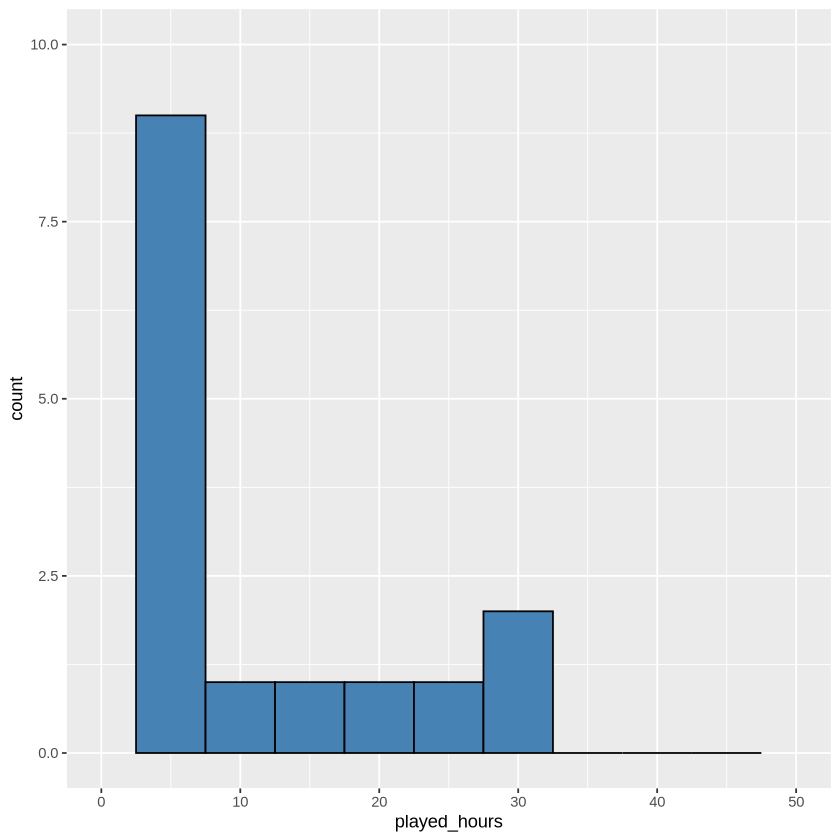

In [9]:
ggplot(players, aes(x = played_hours)) +
    geom_histogram(binwidth =5, fill = "steelblue", color = "black")  +
    scale_x_continuous(limits = c(0, 50)) +
    scale_y_continuous(limits = c(0, 10))
    labs(title = "Distribtution of played hours", 
         x = "Played hours",
         y = "Count")

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


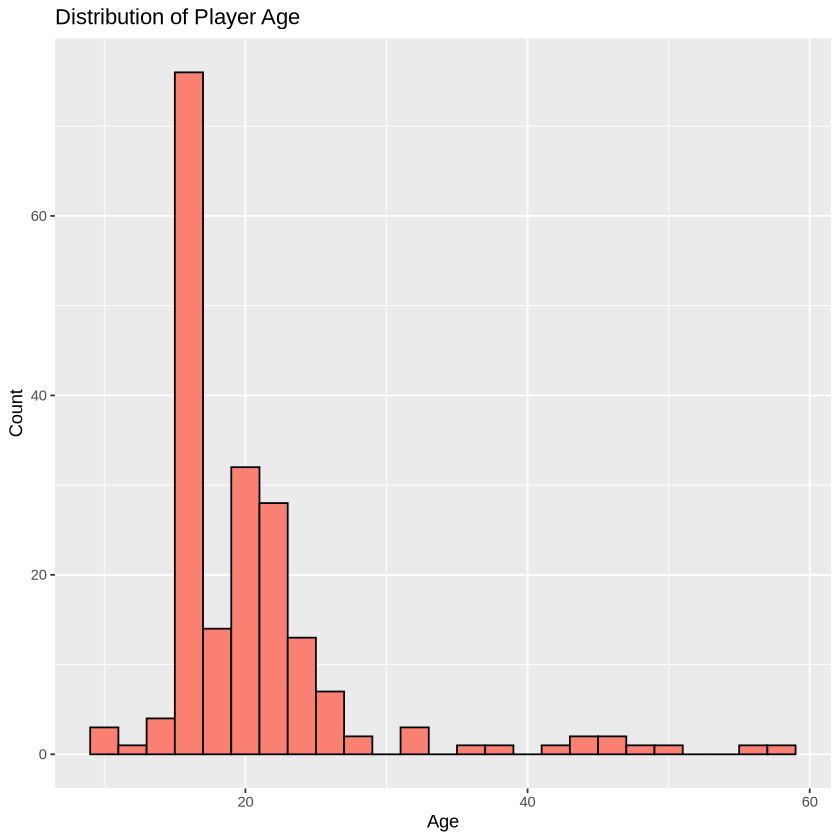

In [10]:
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill="salmon", color="black") +
  labs(title = "Distribution of Player Age", x="Age", y="Count")

Exploratory Data Analysis and Visualization:

The datasets were successfully imported using read_csv.

Minimal wrangling:
Remove rows with missing end_time or original_end_time in session.csv.
Comfirmed variable types(converted to factors).
Verified no duplicate hashedEmail entries.

In [19]:
players <- players |>
  mutate(
    subscribe = as.factor(subscribe),
    experience = as.factor(experience),
    gender = as.factor(gender)
  )
sessions <- sessions |>
    filter(!is.na(end_time), !is.na(original_end_time))
players <- players |>
  distinct(hashedEmail, .keep_all = TRUE)
player_sessions <- sessions |>
    inner_join(players, by = "hashedEmail")
glimpse(players)
glimpse(sessions)
glimpse(player_sessions)

Rows: 196
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,533
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

Now we compute the mean values for each quantitative variable in the players.csv data set

In [15]:
players_mean <- players |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE), 
              mean_age = mean(Age, na.rm = TRUE))
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Exploratory visualizations of the data:
Average Played Hours by Experience Level,
Subscription Rate by Gender

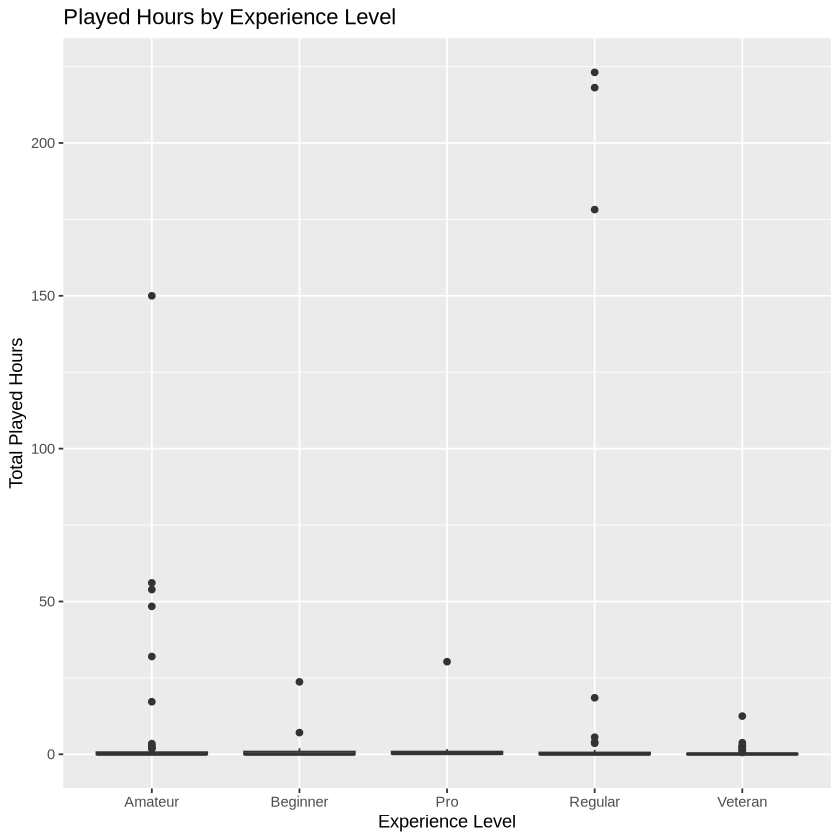

In [20]:
ggplot(players, aes(x = experience, y = played_hours)) +
    geom_boxplot(fill = "lightblue") +
    labs(title = "Played Hours by Experience Level",
         x = "Experience Level",
         y = "Total Played Hours")

Warning message in geom_bar(postition = "fill"):
“Ignoring unknown parameters: `postition`”


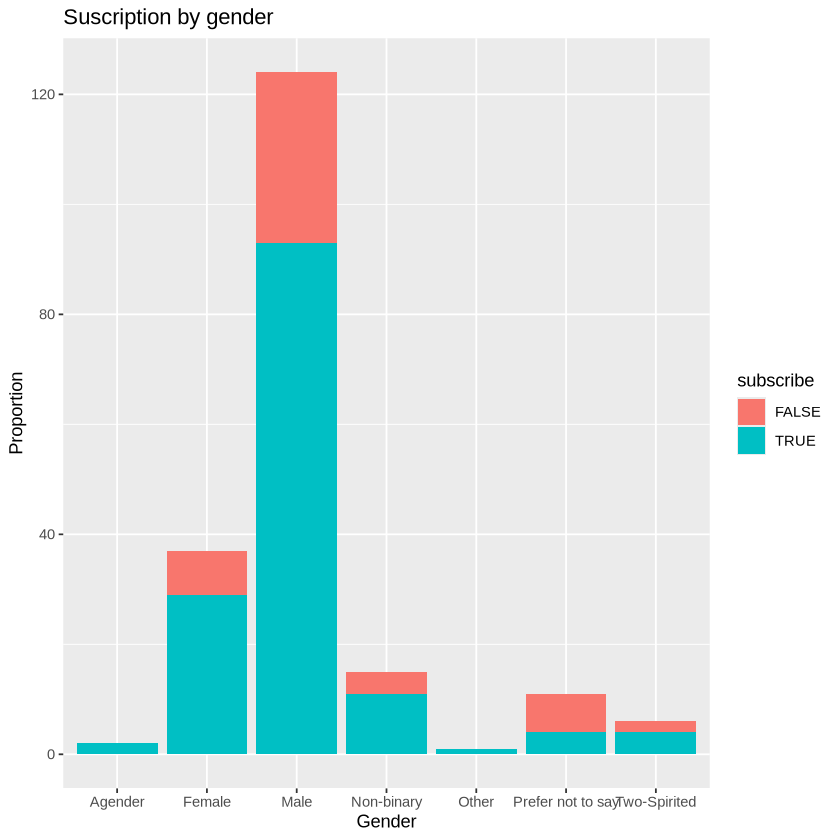

In [24]:
ggplot(players, aes(x = gender, fill = subscribe)) +
    geom_bar(postition = "fill") +
    labs(title = "Suscription by gender",
         x = "Gender",
         y = "Proportion")

Insights: 

Amateur and Regular players tend to have a higher total hours, and the rest does not, so it does not necessary validate experience as a possible predictor of engagement and subscripton.

The propotion of subscribers may differ slightly by gender, though data is quite limited. This variable could interact with others in prediction.


Methods and Plans:
I will use a logistic regression model to predict whether a player is subscribed based on their characteristics(experience, Age, played_hours, and gender.)
Logistic regression is suitable because the response variable is binary, and the goal is to understand how multiple preditors influence the probablity od subscription.

Summary:
Logistic regression is appropriate for predicting subscription from player attributes.

It provides interpretability and aligns well with the dataset size and structure.

The workflow will follow a clean → split → cross-validate → test structure to ensure reliability and transparency.

GitHub repository link:
https://github.com/iliu0720/individual_planning_report.git